In [182]:
import pandas as pd
import xarray as xr
import requests
import codecs
from urllib.request import urlopen
import csv
import json
from pandas.io.json import json_normalize

**1.** Processing TERN Datasets

We have collected key information from observatories in all the states from REM. For more information please see our video or fin our datasets in our Project directory

In [183]:
tern_file_names = {'SA':'Calperum_2019_L6_SA.nc', 
                   'QLD':'CowBay_2019_L3_QLD.nc', 
                   'ACT':'CumberlandPlain_2019_L3_NSW_ACT.nc',
                   'NSW':'CumberlandPlain_2019_L3_NSW_ACT.nc',
                   'VIC':'Otway_2010_L3_VIC.nc', 
                   'WA':'Ridgefield_2019_L3_WA.nc',
                   'NT':'SturtPlains_2019_L3_NT.nc'}

In [226]:
idx = 0
states = ['SA', 'QLD', 'ACT', 'NSW', 'VIC', 'WA', 'NT']
for state in states:
    ds_tern = xr.open_dataset("..\\data\\TERN Datasets\\" + tern_file_names[state])
    df_temp = ds_tern.to_dataframe()
    df_temp.reset_index(level=0, inplace=True)
    df_temp.reset_index(level=0, inplace=True)
    df_temp.reset_index(level=0, inplace=True)
    df_temp.rename(columns={'time':'datetime'}, inplace=True)
    df_temp.datetime = df_temp.datetime.astype(str)
    datetime = df_temp['datetime'].str.split(' ', expand = True)
    df_temp['date'] = datetime[0] 
    df_temp['time'] = datetime[1]
    df_temp.drop(columns =['datetime'], inplace = True)
    if 'CO2' in list(df_temp.columns):
        df_temp.rename(columns={'CO2':'Cc'}, inplace=True)
    df_temp = df_temp[['Cc', 'Ah', 'Cpd', 'Cpm', 'Fc', 'Precip', 'Ta', 'UxUx', 'date', 'time']]
    df_temp['state'] = state
    df_temp['state_code'] = idx
    
    if idx==0:
        df_tern = df_temp.copy()
        idx += 1
    else:
        df_tern = df_tern.append(df_temp)

In [185]:
for c in list(df_tern.columns):
    print(c, end=', ')

Cc, Ah, Cpd, Cpm, Fc, Precip, Ta, UxUx, date, time, state, 

In [227]:
df_tern.head()

,Cc,Ah,Cpd,Cpm,Fc,Precip,Ta,UxUx,date,time,state,state_code
0,388.877528,7.291486,1005.557963,1009.827887,0.517039,0.0,19.00163,0.624214,2019-01-01,00:30:00,SA,0
1,388.924503,7.544990,1005.540848,1009.996043,0.604932,0.0,18.28068,0.538050,2019-01-01,01:00:00,SA,0
2,389.012170,7.832389,1005.526767,1010.190508,0.480547,0.0,17.71246,0.732907,2019-01-01,01:30:00,SA,0
3,388.829733,8.187747,1005.516275,1010.435139,0.515800,0.0,17.25270,0.706021,2019-01-01,02:00:00,SA,0
4,388.674361,8.518704,1005.506944,1010.659730,0.575092,0.0,16.84138,0.783208,2019-01-01,02:30:00,SA,0


In [56]:
df_tern.state.unique()

array(['SA', 'QLD', 'ACT', 'VIC', 'WA', 'NT'], dtype=object)

In [64]:
df_tern.to_csv('tern_data.csv', index=False)

**2.** Processing IMO Datasets

We have used IMO datasets for understanding the ocean and its effects in climate change

In [84]:
df_imos_profiles = pd.read_csv("..\\data\\IMOS Datasets\\IMOS_Argo_Profiles.csv", low_memory=False)
df_imos_phytoplankton = pd.read_csv("..\\data\\IMOS Datasets\\IMOS_Phytoplankton_Abundance.csv", low_memory=False)
df_imos_reef = pd.read_csv("..\\data\\IMOS Datasets\\IMOS_Reef_Life_Survey.csv", low_memory=False)
df_imos_waves = pd.read_csv("..\\data\\IMOS Datasets\\IMOS_Waverider_buoys_Observations.csv", low_memory=False)
df_imos_profiles.iloc[:,3:].head(3)

,data_centre_name,oxygen_sensor,platform_number,cycle_number,direction,data_state_indicator,data_mode,juld,juld_qc,juld_location,...,temp,temp_qc,temp_adjusted,temp_adjusted_qc,temp_adjusted_error,psal,psal_qc,psal_adjusted,psal_adjusted_qc,psal_adjusted_error
0,JMA,False,5900807,1,A,2C,D,2005-01-30T04:46:07Z,1,2005-01-30T06:22:52Z,...,8.596,1,8.596,1,0.002,34.111,1,34.111,1,0.01
1,JMA,False,5900807,1,A,2C,D,2005-01-30T04:46:07Z,1,2005-01-30T06:22:52Z,...,8.590,1,8.590,1,0.002,34.112,1,34.112,1,0.01
2,JMA,False,5900807,1,A,2C,D,2005-01-30T04:46:07Z,1,2005-01-30T06:22:52Z,...,8.592,1,8.592,1,0.002,34.113,1,34.113,1,0.01


**3.** Processing City of Darwing Datasets

This will help us showcase an state in Australia and its levels in pollution. The other data is collected via IoT devices from the observatories in ground and sea that are mentioned in the IMOS and TERN datasets

In [86]:
df_NO2 = pd.read_csv("..\\data\\City of Darwin\\City_of_Darwin_NO2_IoT.csv", low_memory=False)
df_O3 = pd.read_csv("..\\data\\City of Darwin\\City_of_Darwin_O3_IoT.csv", low_memory=False)
df_PM1 = pd.read_csv("..\\data\\City of Darwin\\City_of_Darwin_PM1_IoT.csv", low_memory=False)
df_PM25 = pd.read_csv("..\\data\\City of Darwin\\City_of_Darwin_PM2_5_IoT.csv", low_memory=False)
df_PM10 = pd.read_csv("..\\data\\City of Darwin\\City_of_Darwin_PM10_IoT.csv", low_memory=False)

In [87]:
df_NO2.head()

,time,source,device_name,fragment_series,value,unit,ObjectId
0,2019-08-02T00:42:20.059Z,11889,MQTT Device 5B5218FDC337DEC0,NO2.v,0.000,ppm,1
1,2019-07-31T21:43:46.082Z,11889,MQTT Device 5B5218FDC337DEC0,NO2.v,0.000,ppm,2
2,2019-07-25T15:43:40.429Z,12110,MQTT Device 3B6E10FDC337DE73,NO2.v,0.000,ppm,3
3,2019-07-15T23:07:23.769Z,11889,MQTT Device 5B5218FDC337DEC0,NO2.v,0.001,ppm,4
4,2019-08-16T15:59:53.798Z,11889,MQTT Device 5B5218FDC337DEC0,NO2.v,0.011,ppm,5


In [88]:
# Columns in each dataframe

**4.** Processing Victoria Agricultural Data from API

We have used the API to extract random point in Melourne for understanding the soild in this area. We use this state for showcasing our approach on climate change and how it also affects farming and life

In [141]:
# This is an example of extraction from a point 
api_token = 'd136686e-228b-405b-a01a-6f8ee13600dd'
api_url_base = 'https://api.vic.gov.au:443/avr/soils-api/v1.0/estimates?wgs84_east=145.937310&wgs84_north=-38.245853'
headers = {'apikey':'d136686e-228b-405b-a01a-6f8ee13600dd'}

In [144]:
response = requests.get('https://api.vic.gov.au:443/avr/soils-api/v1.0/estimates?wgs84_east=145.937310&wgs84_north=-38.245853', 
                        headers={'apikey':'d136686e-228b-405b-a01a-6f8ee13600dd'})

In [147]:
json_data = json.loads(response.text)

In [156]:
df_soil = json_normalize(json_data['estimates'])
df_soil.head()

,asc_oso.code,asc_oso.text,clay.description,clay.topsoil,clay.topsoil_stddev,clay.subsoil,clay.subsoil_stddev,ph.description,ph.topsoil,ph.topsoil_stddev,...,organic_carbon.subsoil_stddev,electrical_conductivity.description,electrical_conductivity.topsoil,electrical_conductivity.topsoil_stddev,electrical_conductivity.subsoil,electrical_conductivity.subsoil_stddev,soil_texture_topsoil.code,soil_texture_topsoil.text,soil_texture_subsoil.code,soil_texture_subsoil.text
0,FEAA,Red Ferrosol,clay percentage,19.17,6.33,30.5,7.7,ph value,6.27,0.36,...,0.0,electrical conductivity value,19.17,6.33,0.0,0.0,CL,Clay Loam,SC,Sandy Clay


In [164]:
# Creating random points for checking soil
import random
import sys
import math

latitude = 142.0
longitude = -37.78

def generate_random_data(lat, lon, num_rows):
    for _ in range(num_rows):
        hex1 = '%012x' % random.randrange(16**4) # 12 char random string
        flt = float(random.randint(0,100))
        dec_lat = random.random()/100
        dec_lon = random.random()/100
        print(str(hex1.lower()) + ' ' + str(flt) + ' ' + str(lon+dec_lon) + ' ' + str(lat+dec_lat))

generate_random_data(latitude, longitude, 10)

00000000edac 19.0 -37.775568341276845 142.0001144653371
000000004b46 53.0 -37.7709726746056 142.0073998017869
000000001bf2 70.0 -37.77305030511105 142.00774014193854
0000000063b3 77.0 -37.77971088305568 142.0094686146119
00000000e274 70.0 -37.77394344974804 142.00658133798126
0000000097d4 61.0 -37.7750671701654 142.0052626069132
00000000374d 28.0 -37.7714339841155 142.0029967663387
00000000b7c2 37.0 -37.77078567494598 142.00724096629997
00000000eb76 18.0 -37.77400074118767 142.0091293879801
000000000147 87.0 -37.77079482443528 142.0062737339102


**5.** Showcasing Dimentionality reduction for datasets

This showsthow methos for dimentionality reduction for later clustering application. The methods used here are PCA and LDA, being LDA the best show case. We can see how, in this case, CO2 in certain levels agrupates for different states

In [178]:
df_pca_tern.describe()

,Cc,Ah,Cpd,Cpm,Fc,Precip,Ta,UxUx
count,54547.000000,54110.000000,54547.000000,54110.000000,54095.000000,54439.000000,54120.000000,54547.000000
mean,387.046948,-21.612224,990.035044,1005.033471,-2171.120089,0.015144,13.030274,-76.884534
std,28.343578,558.491735,413.171413,267.700634,4121.935023,0.176173,243.648554,878.214313
min,275.125928,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-9999.000000,-9999.000000
25%,365.902966,6.602857,1005.425000,1009.282747,-13.327562,0.000000,13.054928,0.157268
50%,391.328154,8.655280,1005.529720,1010.779182,-0.479858,0.000000,18.286590,0.465978
75%,402.975019,11.979646,1005.685838,1013.239116,1.030735,0.000000,24.304710,1.232962
max,639.870441,25.333300,1006.410361,1023.374850,49.074796,11.000000,46.359240,18.861649


In [230]:
df_pca_tern = df_tern.copy()
df_pca_tern = df_pca_tern[df_pca_tern['Cc']>0]
df_pca_tern.loc[(df_pca_tern['Cc']<352),'target'] = 1
df_pca_tern.loc[((df_pca_tern['Cc']>352)&(df_pca_tern['Cc']<387)),'target'] = 2
df_pca_tern.loc[(df_pca_tern['Cc']>387),'target'] = 3

In [231]:
df_pca_tern.target.fillna(1, inplace=True)
df_pca_tern.fillna(0, inplace=True)
df_pca_tern.target.unique()

array([3., 2., 1.])

In [232]:
df_pca_tern.drop(columns=['time', 'state', 'date'], inplace=True)

In [203]:
df_pca_tern.dtypes

Cc        float64
Ah        float64
Cpd       float64
Cpm       float64
Fc        float64
Precip    float64
Ta        float64
UxUx      float64
target    float64
dtype: object

explained variance ratio (first two components): [0.92493339 0.04247602]


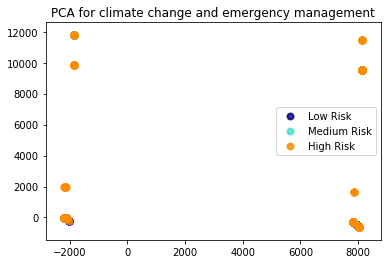

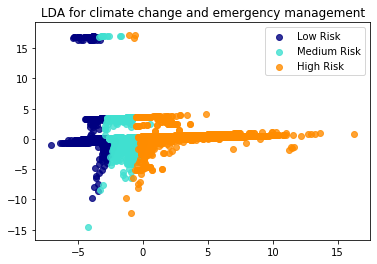

In [216]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df_pca_tern.drop(columns=['target'])
y = df_pca_tern.target
target_names = ['Low Risk', 'Medium Risk', 'High Risk']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA for climate change and emergency management')

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA for climate change and emergency management')

plt.show()

**6.** Showcasing clustering for finding simillar territories

This is for clustering all the states with simillarities. This can be applied worldwide

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

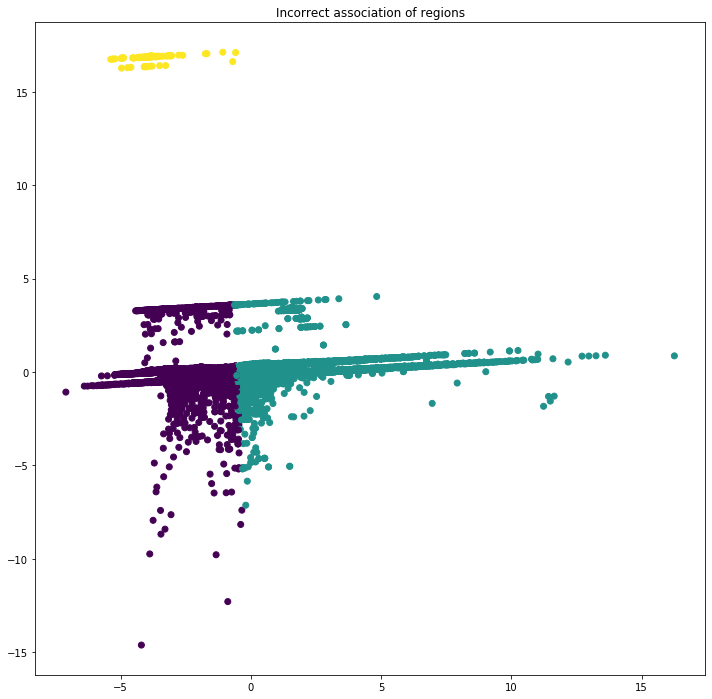

In [243]:
%matplotlib inline
plt.figure(figsize=(12, 12))

#X = df_pca_tern.drop(columns=['state_code']).values
y = df_pca_tern.state_code.values
#X = X_r2.copy()
#X[:,0] = [item + random(1,100) for item in X_r2[:,0]]
#X[:,1] = [item + random(1,100) for item in X_r2[:,1]]

# Using the dataframe from before
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_r2)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect association of regions")
plt.show()

**7.** Running linear regression (Difference-in-Differences) and normal regression

In [252]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
climate_X = df_pca_tern.drop(columns=['state_code', 'target']).values
print(len(climate_X))

# Split the data into training/testing sets
climate_X_train = climate_X[:2500]
climate_X_test = climate_X[2500:]

# Split the targets into training/testing sets
climate_y_train = df_pca_tern.target[:2500]
climate_y_test = df_pca_tern.target[2500:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(climate_X_train, climate_y_train)

# Make predictions using the testing set
climate_y_pred = regr.predict(climate_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(climate_y_test, climate_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(climate_y_test, climate_y_pred))

# Plot outputs
#plt.scatter(climate_X_test, climate_y_test,  color='black')
#plt.plot(climate_X_test, climate_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

54547
Coefficients: 
 [ 2.12878133e-02 -2.92710254e-01 -4.75907192e-01  4.06121210e-01
  8.85304667e-05  5.27039862e-02  3.31379189e-03 -8.58655380e-03]
Mean squared error: 67129.17
Variance score: -130539.52
